In [1]:
pip install numpy pandas statsmodels missingno

Note: you may need to restart the kernel to use updated packages.


# 1.1 随机缺失分析（MCAR)——直方图

In [61]:
import numpy as np
import pandas as pd

# 创建一个示例数据集
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})
# 人为制造缺失值
data.loc[np.random.choice(data.index, size=10, replace=False), "Income"] = np.nan  # 随机缺失 (MCAR)

# 显示缺失值概况
print(data.isnull().sum())

Age           0
Income       10
Education     0
dtype: int64


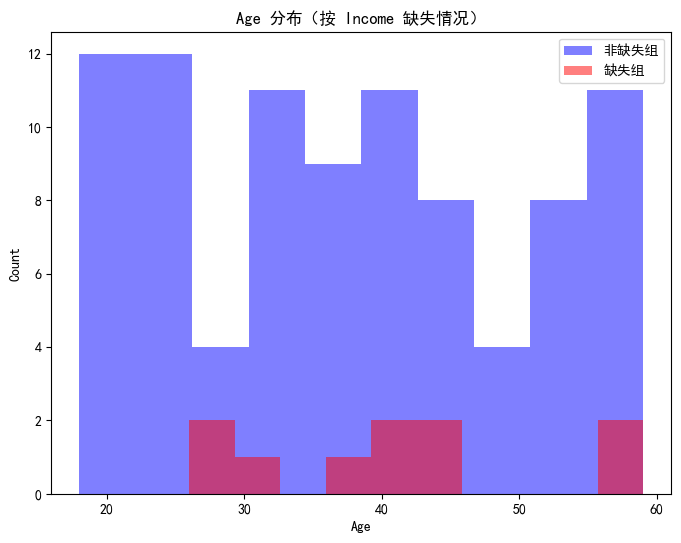

In [62]:
plt.figure(figsize=(8,6))
data["Income_missing"] = data["Income"].isnull().astype(int)
# 直方图分析 Age 分布（按 Income 缺失情况）
plt.hist(data[data["Income_missing"] == 0]["Age"], bins=10, alpha=0.5, label="非缺失组", color="blue")
plt.hist(data[data["Income_missing"] == 1]["Age"], bins=10, alpha=0.5, label="缺失组", color="red")

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age 分布（按 Income 缺失情况）")
plt.show()


# 1.2 随机缺失分析（MCAR)——箱线图

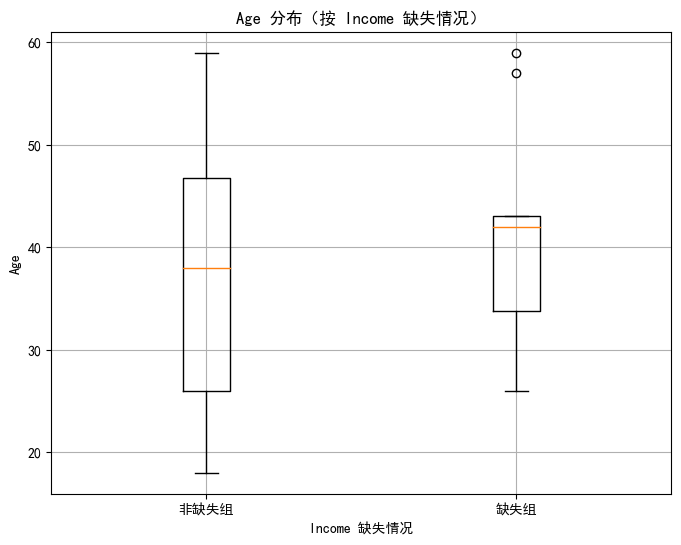

In [63]:
plt.figure(figsize=(8,6))
# 创建缺失标记变量
data["Income_missing"] = data["Income"].isnull().astype(int)

# 使用箱线图比较 Age 分布（按 Income 缺失情况分组）

plt.boxplot(
    [data[data["Income_missing"] == 0]["Age"], data[data["Income_missing"] == 1]["Age"]],
    labels=["非缺失组", "缺失组"]
)

plt.xlabel("Income 缺失情况")
plt.ylabel("Age")
plt.title("Age 分布（按 Income 缺失情况）")
plt.grid(True)

plt.show()

# 1.3 非随机缺失（MAR）——直方图

In [68]:
import numpy as np
import pandas as pd
from statsmodels.imputation.mice import MICEData

del data
# 创建一个示例数据集
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})
# 人为制造缺失值
data.loc[data["Age"] > 50, "Income"] = np.nan  # 受年龄影响的缺失 (MAR)
#data.loc[data["Age"] > 50, "Education"] = np.nan  # 依赖 Age 缺失 (MAR)
#data.loc[data["Income"] > 8000, "Income"] = np.nan  # 依赖自身缺失 (MNAR)


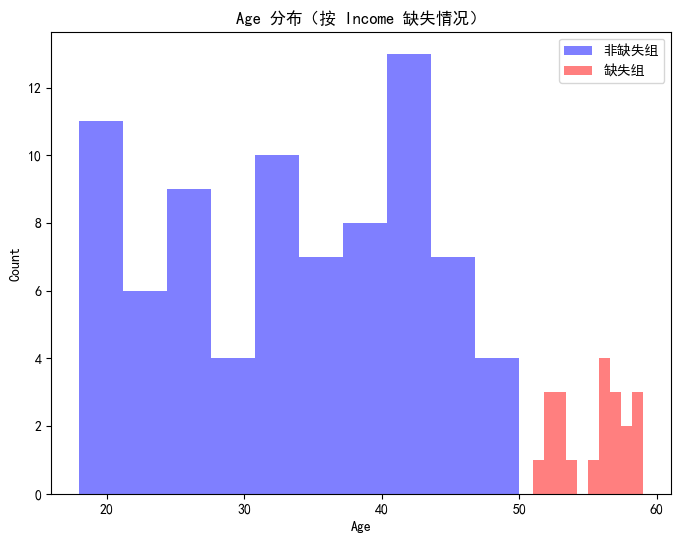

In [69]:
# 显示缺失值概况
plt.figure(figsize=(8,6))
data["Income_missing"] = data["Income"].isnull().astype(int)
# 直方图分析 Age 分布（按 Income 缺失情况）
plt.hist(data[data["Income_missing"] == 0]["Age"], bins=10, alpha=0.5, label="非缺失组", color="blue")
plt.hist(data[data["Income_missing"] == 1]["Age"], bins=10, alpha=0.5, label="缺失组", color="red")

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age 分布（按 Income 缺失情况）")
plt.show()

# 1.4 非随机缺失（MAR）——箱线图

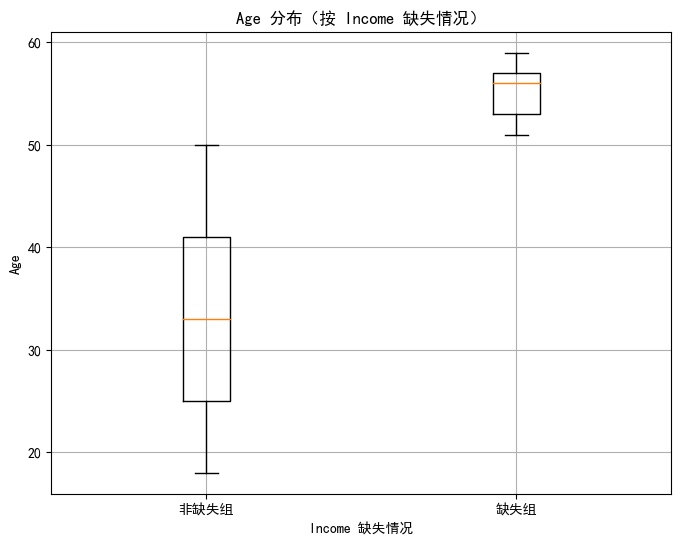

In [70]:
# 使用箱线图比较 Age 分布（按 Income 缺失情况分组）
plt.figure(figsize=(8, 6))
plt.boxplot(
    [data[data["Income_missing"] == 0]["Age"], data[data["Income_missing"] == 1]["Age"]],
    labels=["非缺失组", "缺失组"]
)

plt.xlabel("Income 缺失情况")
plt.ylabel("Age")
plt.title("Age 分布（按 Income 缺失情况）")
plt.grid(True)

plt.show()


# 1.5 非随机缺失（MNAR）——直方图

In [104]:
import numpy as np
import pandas as pd
from statsmodels.imputation.mice import MICEData

del data
# 创建一个示例数据集
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})
# 人为制造缺失值
#data.loc[data["Age"] > 50, "Income"] = np.nan  # 受年龄影响的缺失 (MAR)
#data.loc[data["Age"] > 50, "Education"] = np.nan  # 依赖 Age 缺失 (MAR)
data.loc[data["Income"] > 8000, "Income"] = np.nan  # 依赖自身缺失 (MNAR)


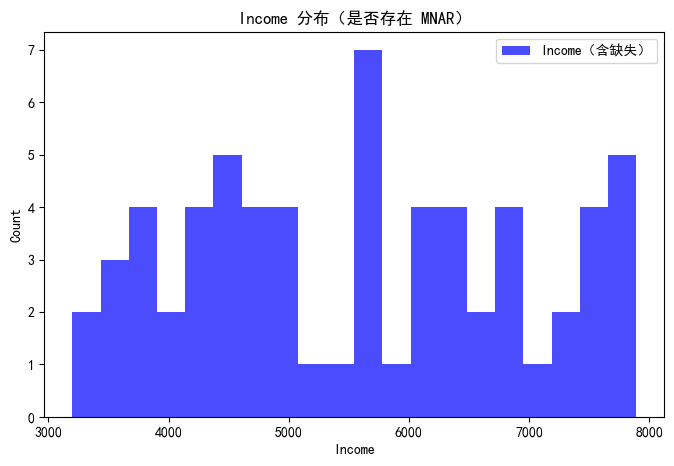

In [105]:
plt.figure(figsize=(8, 5))

# 直方图分析 Income 分布（包含缺失数据）
plt.hist(data["Income"], bins=20, alpha=0.7, color="blue", label="Income（含缺失）")

plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income 分布（是否存在 MNAR）")
plt.legend()
plt.show()


# 2.1 缺失值检测——t-检验（T-Test for MCAR）

T 检验 t 值: -0.8417
T 检验 p 值: 0.4020
p 值大于 0.05，无法拒绝零假设，数据缺失可能是 MCAR 类型（完全随机缺失）。


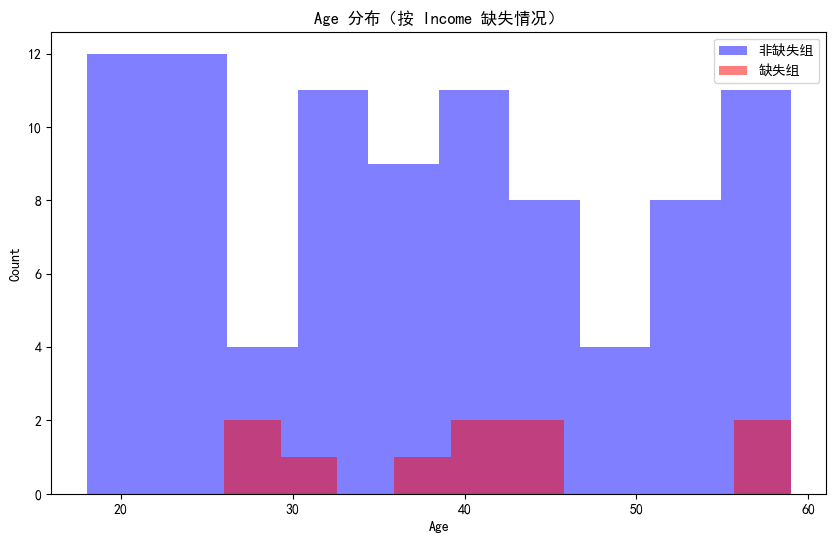

In [107]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
del data
# 创建示例数据集
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})

# 人为制造缺失值
data.loc[np.random.choice(data.index, size=10, replace=False), "Income"] = np.nan  # 随机缺失 (MCAR)

# 创建缺失标记变量
data["Income_missing"] = data["Income"].isnull().astype(int)

# 使用 t 检验检验 "Age" 是否与 "Income" 缺失有关
# 1. 提取非缺失组和缺失组Age数据
age_non_missing = data[data["Income_missing"] == 0]["Age"]
age_missing = data[data["Income_missing"] == 1]["Age"]

# 2. 执行 t 检验 检验两组Age的均值是否存在显著差异。
t_stat, p_value = ttest_ind(age_non_missing, age_missing, nan_policy='omit')

# 3. 打印结果
print(f"T 检验 t 值: {t_stat:.4f}")
print(f"T 检验 p 值: {p_value:.4f}")

# 判断 p 值来判定是否属于 MCAR
if p_value > 0.05:
    print("p 值大于 0.05，无法拒绝零假设，数据缺失可能是 MCAR 类型（完全随机缺失）。")
else:
    print("p 值小于 0.05，拒绝零假设，数据缺失可能不是 MCAR 类型。")

# 可视化缺失数据的分布
plt.figure(figsize=(10, 6))
plt.hist(age_non_missing, bins=10, alpha=0.5, label="非缺失组", color='blue')
plt.hist(age_missing, bins=10, alpha=0.5, label="缺失组", color='red')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age 分布（按 Income 缺失情况）")
plt.show()


# 2.2 缺失值检测——t-检验（T-Test for MCAR）

T 检验 t 值: -10.9198
T 检验 p 值: 0.0000
p 值小于 0.05，拒绝零假设，数据缺失可能不是 MCAR 类型。


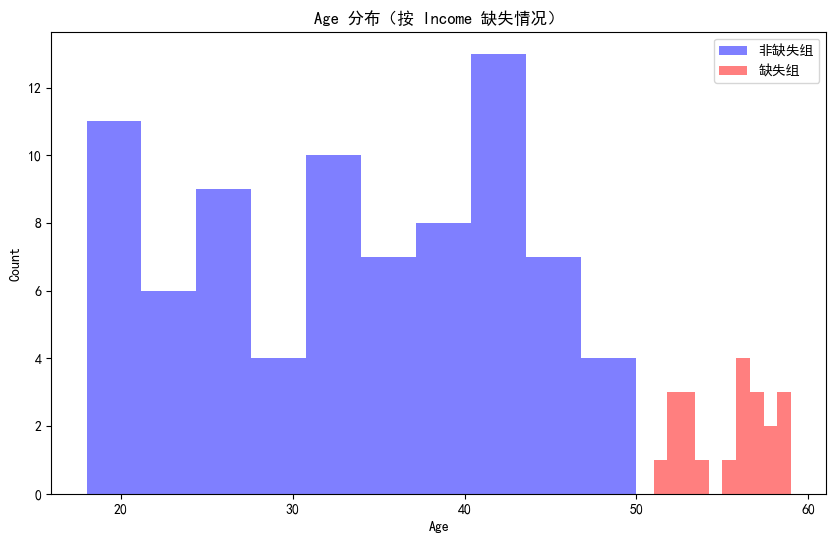

In [108]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
del data
# 创建示例数据集
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})

# 人为制造缺失值
data.loc[data["Age"] > 50, "Income"] = np.nan  # 受年龄影响的缺失 (MAR)

# 创建缺失标记变量
data["Income_missing"] = data["Income"].isnull().astype(int)

# 使用 t 检验检验 "Age" 是否与 "Income" 缺失有关
# 1. 提取非缺失组和缺失组
age_non_missing = data[data["Income_missing"] == 0]["Age"]
age_missing = data[data["Income_missing"] == 1]["Age"]

# 2. 执行 t 检验
t_stat, p_value = ttest_ind(age_non_missing, age_missing, nan_policy='omit')

# 3. 打印结果
print(f"T 检验 t 值: {t_stat:.4f}")
print(f"T 检验 p 值: {p_value:.4f}")

# 判断 p 值来判定是否属于 MCAR
if p_value > 0.05:
    print("p 值大于 0.05，无法拒绝零假设，数据缺失可能是 MCAR 类型（完全随机缺失）。")
else:
    print("p 值小于 0.05，拒绝零假设，数据缺失可能不是 MCAR 类型。")

# 可视化缺失数据的分布
plt.figure(figsize=(10, 6))
plt.hist(age_non_missing, bins=10, alpha=0.5, label="非缺失组", color='blue')
plt.hist(age_missing, bins=10, alpha=0.5, label="缺失组", color='red')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age 分布（按 Income 缺失情况）")
plt.show()


# 3.1 缺失值填充——MCAR（均值，中位数，众数）

In [142]:
import numpy as np
import pandas as pd
del data
# 创建示例数据
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})
data.to_csv("output_data_origin.csv", index=False)
# 创建三个独立的副本（深拷贝）
data_mean = data.copy()  # 用于均值填充的副本
data_median = data.copy()  # 用于中位数填充的副本
data_mode = data.copy()  # 用于众数填充的副本

# 人为制造缺失值（MCAR）
for df in [data_mean, data_median]:
    df.loc[np.random.choice(df.index, size=10, replace=False), "Income"] = np.nan
data_mode.loc[np.random.choice(data_mode.index, size=10, replace=False), "Education"] = np.nan

data_mean.to_csv("output_data_mean1.csv", index=False)
data_mode.to_csv("output_data_mode1.csv", index=False)
# 设置Pandas的显示选项，确保能够显示全部数据
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

# 打印整个数据集
print(data_mean)

# --------------------------
# 使用均值填充缺失值
# --------------------------
mean_income = data_mean["Income"].mean()  # 计算均值
data_mean["Income_filled_mean"] = data_mean["Income"].fillna(mean_income)  # 填充到副本中
print(f"\nMean Income: {mean_income}")  # 打印均值

# 显示填充结果
#print("\n 均值填充示例:")
# print(data_mean)
data_mean.to_csv("output_data_mean2.csv", index=False)

# --------------------------
# 使用中位数填充缺失值
# --------------------------
median_income = data_median["Income"].median()  # 计算中位数
data_median["Income_filled_median"] = data_median["Income"].fillna(median_income)  # 填充到副本中
print(f"Median Income: {median_income}")  # 打印中位数

# 显示填充结果
print("\n中位数填充示例:")
print(data_median[["Income", "Income_filled_median"]].head())

# 使用众数填充（仅适用于分类变量，此处仅为示例）
mode_income = data_mode["Education"].mode()[0]  # 取第一个众数
data_mode["Eduacation_filled_mode"] = data_mode["Education"].fillna(mode_income)
data_mode.to_csv("output_data_mode2.csv", index=False)
print(f"\n Mode(0) Education: {mode_income}")  # 打印中位数

# 对比填充前后的统计量
print("\n填充前 Income 均值:", data["Income"].mean())
print("填充前 Income 中位数:", data["Income"].median())
print("均值填充后 Income 均值:", data_mean["Income_filled_mean"].mean())
print("中位数填充后 Income 中位数:", data_median["Income_filled_median"].median())


    Age  Income    Education
0    56  3200.0     Bachelor
1    46  8959.0       Master
2    32  7875.0     Bachelor
3    25  6104.0       Master
4    38  7598.0  High School
5    56  5454.0  High School
6    36  6645.0  High School
7    40  8847.0          PhD
8    28  3804.0  High School
9    28  9242.0       Master
10   41  5731.0  High School
11   53  8991.0     Bachelor
12   57     NaN     Bachelor
13   41  4570.0          PhD
14   20  8056.0     Bachelor
15   39     NaN       Master
16   19  8581.0  High School
17   41  5690.0          PhD
18   47  6840.0  High School
19   55  4028.0  High School
20   19  3502.0       Master
21   38  9910.0     Bachelor
22   50  7493.0     Bachelor
23   29  3870.0  High School
24   39  9938.0          PhD
25   42     NaN     Bachelor
26   44  3206.0          PhD
27   59  8134.0     Bachelor
28   45  8977.0          PhD
29   33  4484.0       Master
30   32     NaN          PhD
31   20  5790.0       Master
32   54  3563.0       Master
33   24  8116.

# 3.2 缺失值填充——MCAR（线性插值法）

Missing values before filling: 10
Missing values after filling: 0


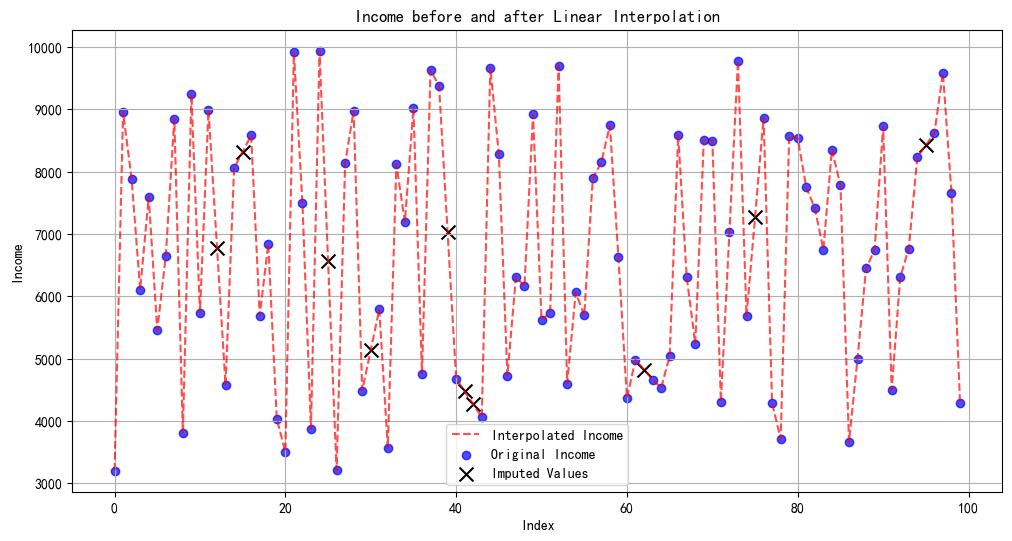

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例数据集
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, size=100),
    "Income": np.random.randint(3000, 10000, size=100).astype(float),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=100)
})

# 人为制造缺失值（MCAR）
missing_indices = np.random.choice(data.index, size=10, replace=False)
data.loc[missing_indices, "Income"] = np.nan  # 随机缺失 (MCAR)

# 使用线性插值填充缺失数据
data["Income_filled"] = data["Income"].interpolate(method='linear')

# 显示缺失值概况
print("Missing values before filling:", data["Income"].isnull().sum())
print("Missing values after filling:", data["Income_filled"].isnull().sum())

# 可视化插值前后的数据
plt.figure(figsize=(12, 6))

# 原始数据（蓝色折线）
plt.plot(data.index, data["Income_filled"], label="Interpolated Income", color="red", linestyle="--", alpha=0.7)

# 原始数据点（蓝色）
plt.scatter(data.index, data["Income"], label="Original Income", color="blue", marker="o", alpha=0.7)

# 缺失值（插值前的NaN点，以黑色X标记）
plt.scatter(missing_indices, data.loc[missing_indices, "Income_filled"], color="black", marker="x", s=100, label="Imputed Values")

plt.xlabel("Index")
plt.ylabel("Income")
plt.title("Income before and after Linear Interpolation")
plt.legend()
plt.grid(True)
plt.show()
